# Project Code 

## Import Main Modules

In [1]:
import argparse
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
# imports used by the resnet implementation
from torch.nn import init
import math

## Import Datasets

In [2]:
# Initial parameters
dataset = 'cifar10'
batch_size = 64
epochs = 10
lr = 0.01

Comment: We can also do it on MNIST dataset

In [3]:
# Data Loading
# This cell might take some time when you run it for the first time
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)
elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

Files already downloaded and verified


In [4]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images[0].shape # image size

torch.Size([3, 32, 32])

## View Datasets

In [5]:
# Design the function to show an image
import matplotlib.pyplot as plt

def imshow(img):
    """function to show an image"""
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
# classes of images
if dataset == 'mnist':
    classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
elif dataset == 'cifar10':
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

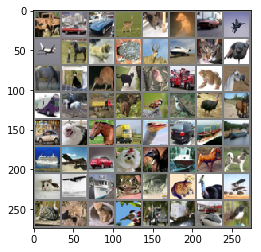

In [6]:
# This cell can give us a better understanding of dataset.
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
plt.show()
# print labels
print('Label is as follows:')
print((' ' + ' '.join('%5s' % classes[labels[j]] if (j + 1) % 8 != 0 else '%5s' % classes[labels[j]] + '\n' for j in range(len(labels)) )))

## Define Neural Networks

### Single Layer Network with Linear Transformations

In [9]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784 # number of input
elif dataset == 'cifar10':
    num_inputs = 3072 # number of input

num_outputs = 10 # number of output, the same for both mnist and cifar10 datasets

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        # print(input.shape)
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        output = output
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [10]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0])))

def test():
    network.eval() 
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset))))

In [11]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.365305
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.782508
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.772463
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.932725
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.821323
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.802516
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.854338
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.890429

Test set: Average loss: 1.7789, Accuracy: 3839/10000 (38%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.785598
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.662673
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.636844
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.774476
Train Epoch: 2 [25600/50000 (51%)]	Loss: 2.045124
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.766758
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.817403
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.836288

Test set: Average loss: 1.7448, Accuracy: 3989/10000 (40%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.639829
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.665

### Two Layer Network with Linear Transformations

In [12]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
num_hiddens = num_inputs # To prepare for residue network

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_inputs, num_hiddens)
        self.fc2 = nn.Linear(num_hiddens, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        hidden = self.fc1(input)
        output = self.fc2(F.tanh(hidden))
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [13]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0])))

def test():
    network.eval() 
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset))))

In [14]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.328527
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.918596
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.914238
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.980046
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.774175
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.822827
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.655791
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.728971

Test set: Average loss: 1.7700, Accuracy: 3870/10000 (39%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.815831
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.806710
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.819750
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.754139
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.381035
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.513029
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.888826
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.683622

Test set: Average loss: 1.7363, Accuracy: 3983/10000 (40%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.732063
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.662

### One Layer ResNet with Linear Transformations

In [15]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
num_hiddens = num_inputs # To prepare for residue network

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_inputs, num_hiddens)
        self.fc2 = nn.Linear(num_hiddens, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        hidden = self.fc1(input) + input # Residue part
        output = self.fc2(F.tanh(hidden))
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [16]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0])))

def test():
    network.eval() 
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset))))

In [17]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.304604
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.872725
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.887975
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.669505
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.757973
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.976917
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.869448
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.695397

Test set: Average loss: 1.7598, Accuracy: 3869/10000 (39%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.854672
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.836346
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.586532
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.528037
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.806559
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.562513
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.745626
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.558773

Test set: Average loss: 1.7100, Accuracy: 4072/10000 (41%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.778471
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.749

### One Layer ResNet with Activation Functions

In [18]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
num_hiddens = num_inputs # To prepare for residue network

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_inputs, num_hiddens)
        self.fc2 = nn.Linear(num_hiddens, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        hidden = F.relu(self.fc1(input)) + input # Residue part
        output = self.fc2(F.tanh(hidden))
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [19]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0])))

def test():
    network.eval() 
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset))))

In [20]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.359092
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.951125
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.861476
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.593782
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.939704
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.787285
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.722223
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.800961

Test set: Average loss: 1.6760, Accuracy: 4177/10000 (42%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.804432
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.707805
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.763523
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.332678
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.634637
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.595577
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.536187
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.640916

Test set: Average loss: 1.6054, Accuracy: 4394/10000 (44%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.449031
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.356

### One Layer Convolutional ResNet with Activation Functions

In [31]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
num_hiddens = num_inputs # To prepare for residue network

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_inputs, num_hiddens)
        self.fc2 = nn.Linear(num_hiddens, num_outputs)
        self.conv = nn.Conv2d(3, 3, kernel_size=3, stride=1, padding=1, bias=False)

    def forward(self, input):
        # input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        hidden = F.relu(self.conv(input)) + input # Residue part
        hidden = hidden.view(-1, num_hiddens)
        output = self.fc2(F.tanh(hidden))
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [32]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0])))

def test():
    network.eval() 
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset))))

In [33]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.343016
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.938352
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.697794
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.792659
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.772689
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.683789
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.819510
Train Epoch: 1 [44800/50000 (90%)]	Loss: 2.020418

Test set: Average loss: 1.7191, Accuracy: 4071/10000 (41%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.745724
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.891966
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.656613
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.654277
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.700070
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.779191
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.607825
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.920474

Test set: Average loss: 1.6820, Accuracy: 4159/10000 (42%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.529215
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.673

### Three Layer Convolutional Network

In [44]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
num_hiddens = num_inputs # To prepare for residue network

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 3, kernel_size=3, stride=1, padding=1, bias=False)
        self.conv2 = nn.Conv2d(3, 3, kernel_size = 5, stride=1, padding=2)
        self.fc1 = nn.Linear(num_inputs, num_hiddens)
        self.fc2 = nn.Linear(num_hiddens, num_outputs)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, input):
        out = F.tanh(self.conv1(input)) # Residue part
        out = F.tanh(self.conv2(out))
        out = out.view(-1, num_inputs) # reshape input to batch x num_inputs
        out = F.tanh(self.fc1(out))
        output = self.fc2(out)
        # output = self.fc2(F.tanh(out))
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [45]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0])))

def test():
    network.eval() 
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset))))

In [46]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.304411
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.206069
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.968199
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.881027
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.018491
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.855460
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.818585
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.738160

Test set: Average loss: 1.7610, Accuracy: 3795/10000 (38%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.937292
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.812229
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.747871
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.628088
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.888902
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.619740
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.696236
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.693753

Test set: Average loss: 1.6823, Accuracy: 4141/10000 (41%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.641963
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.510

## ResNet Implementation by Kaiming He

### Basic Block

In [8]:
class ResNetBasicblock(nn.Module):
  expansion = 1
  """
  RexNet basicblock (https://github.com/facebook/fb.resnet.torch/blob/master/models/resnet.lua)
  """
  def __init__(self, inplanes, planes, stride=1, downsample=None):
    super(ResNetBasicblock, self).__init__()

    self.conv_a = nn.Conv2d(inplanes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
    self.bn_a = nn.BatchNorm2d(planes)

    self.conv_b = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
    self.bn_b = nn.BatchNorm2d(planes)

    self.downsample = downsample

  def forward(self, x):
    residual = x

    basicblock = self.conv_a(x)
    basicblock = self.bn_a(basicblock)
    basicblock = F.relu(basicblock, inplace=True)

    basicblock = self.conv_b(basicblock)
    basicblock = self.bn_b(basicblock)

    if self.downsample is not None:
      residual = self.downsample(x)
    
    return F.relu(residual + basicblock, inplace=True)

### ResNet for CIFAR

In [9]:
class CifarResNet(nn.Module):
  """
  ResNet optimized for the Cifar dataset, as specified in
  https://arxiv.org/abs/1512.03385.pdf
  """
  def __init__(self, block, depth, num_classes):
    """ Constructor
    Args:
      depth: number of layers.
      num_classes: number of classes
      base_width: base width
    """
    super(CifarResNet, self).__init__()

    #Model type specifies number of layers for CIFAR-10 and CIFAR-100 model
    assert (depth - 2) % 6 == 0, 'depth should be one of 20, 32, 44, 56, 110'
    layer_blocks = (depth - 2) // 6
    print(('CifarResNet : Depth : {} , Layers for each block : {}'.format(depth, layer_blocks)))

    self.num_classes = num_classes

    self.conv_1_3x3 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
    self.bn_1 = nn.BatchNorm2d(16)

    self.inplanes = 16
    self.stage_1 = self._make_layer(block, 16, layer_blocks, 1)
    self.stage_2 = self._make_layer(block, 32, layer_blocks, 2)
    self.stage_3 = self._make_layer(block, 64, layer_blocks, 2)
    self.avgpool = nn.AvgPool2d(8)
    self.classifier = nn.Linear(64*block.expansion, num_classes)

    for m in self.modules():
      if isinstance(m, nn.Conv2d):
        n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
        m.weight.data.normal_(0, math.sqrt(2. / n))
        #m.bias.data.zero_()
      elif isinstance(m, nn.BatchNorm2d):
        m.weight.data.fill_(1)
        m.bias.data.zero_()
      elif isinstance(m, nn.Linear):
        init.kaiming_normal(m.weight)
        m.bias.data.zero_()

  def _make_layer(self, block, planes, blocks, stride=1):
    downsample = None
    if stride != 1 or self.inplanes != planes * block.expansion:
      downsample = DownsampleA(self.inplanes, planes * block.expansion, stride)

    layers = []
    layers.append(block(self.inplanes, planes, stride, downsample))
    self.inplanes = planes * block.expansion
    for i in range(1, blocks):
      layers.append(block(self.inplanes, planes))

    return nn.Sequential(*layers)

  def forward(self, x):
    x = self.conv_1_3x3(x)
    x = F.relu(self.bn_1(x), inplace=True)
    x = self.stage_1(x)
    x = self.stage_2(x)
    x = self.stage_3(x)
    x = self.avgpool(x)
    x = x.view(x.size(0), -1)
    return self.classifier(x)

### Predefined Models of Different Depth

In [10]:
def resnet20(num_classes=10):
  """Constructs a ResNet-20 model for CIFAR-10 (by default)
  Args:
    num_classes (uint): number of classes
  """
  model = CifarResNet(ResNetBasicblock, 20, num_classes)
  return model

def resnet32(num_classes=10):
  """Constructs a ResNet-32 model for CIFAR-10 (by default)
  Args:
    num_classes (uint): number of classes
  """
  model = CifarResNet(ResNetBasicblock, 32, num_classes)
  return model

def resnet44(num_classes=10):
  """Constructs a ResNet-44 model for CIFAR-10 (by default)
  Args:
    num_classes (uint): number of classes
  """
  model = CifarResNet(ResNetBasicblock, 44, num_classes)
  return model

def resnet56(num_classes=10):
  """Constructs a ResNet-56 model for CIFAR-10 (by default)
  Args:
    num_classes (uint): number of classes
  """
  model = CifarResNet(ResNetBasicblock, 56, num_classes)
  return model

def resnet110(num_classes=10):
  """Constructs a ResNet-110 model for CIFAR-10 (by default)
  Args:
    num_classes (uint): number of classes
  """
  model = CifarResNet(ResNetBasicblock, 110, num_classes)
  return model

### Code for Downsampling 

In [11]:
class DownsampleA(nn.Module):  

  def __init__(self, nIn, nOut, stride):
    super(DownsampleA, self).__init__() 
    assert stride == 2    
    self.avg = nn.AvgPool2d(kernel_size=1, stride=stride)   

  def forward(self, x):   
    x = self.avg(x)  
    return torch.cat((x, x.mul(0)), 1)  

class DownsampleC(nn.Module):     

  def __init__(self, nIn, nOut, stride):
    super(DownsampleC, self).__init__()
    assert stride != 1 or nIn != nOut
    self.conv = nn.Conv2d(nIn, nOut, kernel_size=1, stride=stride, padding=0, bias=False)

  def forward(self, x):
    x = self.conv(x)
    return x

class DownsampleD(nn.Module):

  def __init__(self, nIn, nOut, stride):
    super(DownsampleD, self).__init__()
    assert stride == 2
    self.conv = nn.Conv2d(nIn, nOut, kernel_size=2, stride=stride, padding=0, bias=False)
    self.bn   = nn.BatchNorm2d(nOut)

  def forward(self, x):
    x = self.conv(x)
    x = self.bn(x)
    return x

### Training on Predefined ResNet Models

In [12]:
# Using the 20 layers version
network = resnet20()
optimizer = optim.SGD(network.parameters(), lr=lr)

CifarResNet : Depth : 20 , Layers for each block : 3


In [13]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0])))

def test():
    network.eval() 
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset))))

In [14]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/50000 (0%)]	Loss: 3.537928
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.911000
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.673421
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.532033
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.678790
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.749640
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.701620
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.593550

Test set: Average loss: 1.5835, Accuracy: 4134/10000 (41%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.541664
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.329009
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.340800
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.310734
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.512239
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.569908
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.471153
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.442281

Test set: Average loss: 1.5631, Accuracy: 4444/10000 (44%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.325203
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.446

### ResNets on Larger Mini Batches

In [15]:
# Initial parameters
dataset = 'cifar10'
batch_size = 128
epochs = 10
lr = 0.01

In [16]:
# Data Loading
# This cell might take some time when you run it for the first time
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)
elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [17]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images[0].shape # image size

torch.Size([3, 32, 32])

In [18]:
# Using the 20 layers version
network = resnet20()
optimizer = optim.SGD(network.parameters(), lr=lr)

CifarResNet : Depth : 20 , Layers for each block : 3


In [19]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0])))

def test():
    network.eval() 
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset))))

In [20]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/50000 (0%)]	Loss: 3.261957
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.934431
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.850796
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.731123

Test set: Average loss: 1.6581, Accuracy: 3786/10000 (38%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.620517


KeyboardInterrupt: 

## New network

In [5]:
# Setup
dataset = 'cifar10'
batch_size = 64   # input batch size for training
epochs = 20       # number of epochs to train
lr = 0.01        # learning rate

In [6]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs
# num_hiddens = 1000

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        # self.fc1 = nn.Linear(num_inputs, num_hiddens)
        # self.fc2 = nn.Linear(num_hiddens, num_outputs)
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5)
        self.conv2 = nn.Conv2d(16, 128, kernel_size=5)
        self.pool  = nn.MaxPool2d(2,2) 
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(128*5*5, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, input):
        x = self.pool(F.tanh(self.conv1(input)))
        x = self.pool(F.tanh(self.conv2(x)))
        x = x.view(-1, 128*5*5) # Flatten layer
        x = F.tanh(self.fc1(x))
        output = self.fc2(x)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [7]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0])))

def test():
    network.eval() 
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print(('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset))))

In [8]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.303314
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.213146
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.077379
Train Epoch: 1 [19200/50000 (38%)]	Loss: 2.022295
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.041986
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.922498
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.942169
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.989423

Test set: Average loss: 1.7991, Accuracy: 3747/10000 (37%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.814808
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.622329
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.792118
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.635594
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.616716
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.650919
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.613849
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.688351

Test set: Average loss: 1.6176, Accuracy: 4163/10000 (42%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.752302
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.552


Test set: Average loss: 0.9776, Accuracy: 6608/10000 (66%)

Train Epoch: 19 [0/50000 (0%)]	Loss: 0.798673
Train Epoch: 19 [6400/50000 (13%)]	Loss: 0.744533
Train Epoch: 19 [12800/50000 (26%)]	Loss: 0.981739
Train Epoch: 19 [19200/50000 (38%)]	Loss: 0.840798
Train Epoch: 19 [25600/50000 (51%)]	Loss: 0.804250
Train Epoch: 19 [32000/50000 (64%)]	Loss: 0.895907
Train Epoch: 19 [38400/50000 (77%)]	Loss: 0.738011
Train Epoch: 19 [44800/50000 (90%)]	Loss: 0.832917

Test set: Average loss: 1.0414, Accuracy: 6357/10000 (64%)

Train Epoch: 20 [0/50000 (0%)]	Loss: 0.881522
Train Epoch: 20 [6400/50000 (13%)]	Loss: 0.752774
Train Epoch: 20 [12800/50000 (26%)]	Loss: 0.880811
Train Epoch: 20 [19200/50000 (38%)]	Loss: 0.754492
Train Epoch: 20 [25600/50000 (51%)]	Loss: 0.727606
Train Epoch: 20 [32000/50000 (64%)]	Loss: 1.150230
Train Epoch: 20 [38400/50000 (77%)]	Loss: 0.752558
Train Epoch: 20 [44800/50000 (90%)]	Loss: 0.958905

Test set: Average loss: 0.9355, Accuracy: 6748/10000 (67%)



# Simple Backpropgation 

In [7]:
import numpy as np
import pickle
from sklearn import preprocessing
from sklearn.utils import shuffle
import re

# ok
def _preprocess(data_set, random_state=None, frac=0.5):
    with open('./uci/' + data_set + '.data', 'r') as _file:
        data_array = []
        for line in _file:
            tmp = line.rstrip().split(',')
            data_array.append(tmp)
        data_array = np.array(data_array)
        features = data_array[:, :-1].astype(np.float)
        print(features)
        labels = data_array[:, -1]
        classes = list(set(labels))
        if data_set != 'kin8nm':
            for i in range(labels.shape[0]):
                if labels[i] == classes[0]:
                    labels[i] = 1
                else:
                    labels[i] = -1
        labels = labels.astype(np.float)
        features, labels = shuffle(features, labels, random_state=random_state)
        frac = int( features.shape[0] * frac )
        xTrain = features[:frac, :]
        xTest = features[frac:, :]
        yTrain = labels[:frac]
        yTest = labels[frac:]
        
        print(xTrain)
        scaler = preprocessing.MinMaxScaler(feature_range=(0., 1.))
        xTrain = scaler.fit_transform(xTrain)
        xTest = scaler.transform(xTest)
        mTrain = np.mean(xTrain,axis=0)
        xTrain -= mTrain
        xTest -= mTrain
        _list = [xTrain, yTrain, xTest, yTest]
        with open('data_python/' + data_set, 'wb') as _file:
            pickle.dump(_list, _file)
            
def preprocessor_libsvm_data(filename, format_label_func=lambda _: _):
    with open('./uci/' + filename + '.data', 'r') as inputfile:
        features = []
        labels = []
        for line in inputfile:
            container = line.rstrip().split()
            label = float(container[0])
            label = int(format_label_func(label))
            del container[0]
            pattern = re.compile(r"[-+]?\d+:([-+]?\d*\.\d+|[-+]?\d+)")
            feature = []
            for phrase in container:
                # print(phrase)
                target = re.findall(pattern, phrase)
                # print(target)
                feature.append(float(target[0]))
            features.append(feature)
            labels.append(label)
        classes = list(set(labels))
        for i in range(len(labels)):
            if labels[i] == classes[0]:
                labels[i] = 1
            else:
                labels[i] = -1
        features = np.array(features)
        labels = np.array(labels).reshape((-1,1))
        labels = labels.astype(np.float)
        data = np.concatenate((features,labels),axis=1)
        #np.random.shuffle(data)
        x = data[:,:-1]
        y = data[:,-1]
        frac = int( features.shape[0] * 0.8 )
        xTrain = x[:frac, :]
        xTest = x[frac:, :]
        yTrain = y[:frac]
        yTest = y[frac:]
        scaler = preprocessing.MinMaxScaler(feature_range=(0., 1.))
        xTrain = scaler.fit_transform(xTrain)
        xTest = scaler.transform(xTest)
        _mean = np.mean(xTrain,axis=0)
        xTrain = xTrain - _mean
        xTest = xTest - _mean
        _list = [xTrain, yTrain, xTest, yTest]
        with open('./uci data/' + filename, 'wb') as _file:
            pickle.dump(_list, _file)

In [8]:
preprocessor_libsvm_data("heart")

In [11]:
def load_data(dataset):
    with open('./uci data/' + dataset, 'rb') as f:
            [xTrain, yTrain, xTest, yTest] = pickle.load(f)
    return xTrain, yTrain, xTest, yTest

In [12]:
xTrain, yTrain, xTest, yTest = load_data("heart")

In [13]:
import argparse
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [14]:
xTrain = torch.from_numpy(xTrain)
yTrain = torch.from_numpy(yTrain)
xTest = torch.from_numpy(xTest)
yTest = torch.from_numpy(yTest)

In [15]:
xTrain


 0.3240  0.3333  0.2762  ...   0.2014  0.7701 -0.4144
 0.2615 -0.6667 -0.0571  ...   0.2014 -0.2299  0.5856
 0.0531  0.3333 -0.3904  ...  -0.2986 -0.2299  0.5856
          ...             ⋱             ...          
 0.0740  0.3333  0.2762  ...   0.2014  0.7701  0.5856
-0.5302  0.3333 -0.3904  ...  -0.2986 -0.2299 -0.4144
-0.2802 -0.6667 -0.3904  ...  -0.2986 -0.2299 -0.4144
[torch.DoubleTensor of size 216x13]

In [16]:
trainset = torch.cat([xTrain, yTrain], 1)
testset = torch.cat([xTest, yTest], 1)

In [17]:
# Initial parameters
batch_size = 4
epochs = 10
lr = 0.01
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

In [18]:
dataiter = iter(train_loader)

In [19]:
dataiter.next().shape

torch.Size([4, 14])

In [20]:
a = torch.randn(3)

In [21]:
a


 1.0600
 0.4005
 1.1245
[torch.FloatTensor of size 3]

In [22]:
a.numpy()

array([1.0600429, 0.4004922, 1.1245046], dtype=float32)

In [23]:
def step_function(torch_vec):
    vec = torch_vec.data.numpy()
    for (i, item) in enumerate(vec):
        if item > 0:
            vec[i] = 1
        else:
            vec[i] = -1
    return torch.from_numpy(vec)

In [24]:
num_inputs = 13
num_outputs = 1 # number of output, the same for both mnist and cifar10 datasets

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        # print(input.shape)
        # input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        # print(output.shape)
        output = output
        return step_function(output)

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [25]:
def train(epoch):
    network.train()
    for batch_idx, data in enumerate(train_loader):
        data = data.type(torch.FloatTensor)
        data, target = Variable(data[:, :-1]), Variable(data[:, -1])
        optimizer.zero_grad()
        output = network(data)
        output = output.view(batch_size)
        output = Variable(output)
        target = target.type(torch.FloatTensor)
        loss = (output - target).norm(1)/2
        var_loss = Variable(loss.data, requires_grad=True)
        # loss = F.cross_entropy(output, target)
        var_loss.backward()
        optimizer.step()
        if batch_idx % 4 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test():
    network.eval() 
    test_loss = 0
    correct = 0
    for data in test_loader:
        data = data.type(torch.FloatTensor)
        data, target = Variable(data[:, :-1], volatile=True), Variable(data[:, -1]
        output = network(data)                                                             
        target = target.type(torch.FloatTensor)
        test_loss += (output - target).norm(1)/2
        # test_loss += F.cross_entropy(output, target, size_average=False).data[0] # sum up batch loss
        correct += batch_size - torch.sum((output - target == 0).int()).data[0]

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {}, Accuracy: {}/{} ({}%)\n'.format(
      test_loss, correct, 4*len(test_loader.dataset), correct/(4*len(test_loader.dataset))))

SyntaxError: invalid syntax (<ipython-input-25-ad2080ae5e47>, line 28)

In [332]:
for epoch in range(1, epochs + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/216 (0%)]	Loss: 3.000000
Train Epoch: 1 [16/216 (7%)]	Loss: 2.000000
Train Epoch: 1 [32/216 (15%)]	Loss: 3.000000
Train Epoch: 1 [48/216 (22%)]	Loss: 4.000000
Train Epoch: 1 [64/216 (30%)]	Loss: 4.000000
Train Epoch: 1 [80/216 (37%)]	Loss: 3.000000
Train Epoch: 1 [96/216 (44%)]	Loss: 4.000000
Train Epoch: 1 [112/216 (52%)]	Loss: 3.000000
Train Epoch: 1 [128/216 (59%)]	Loss: 2.000000
Train Epoch: 1 [144/216 (67%)]	Loss: 1.000000
Train Epoch: 1 [160/216 (74%)]	Loss: 3.000000
Train Epoch: 1 [176/216 (81%)]	Loss: 2.000000
Train Epoch: 1 [192/216 (89%)]	Loss: 2.000000
Train Epoch: 1 [208/216 (96%)]	Loss: 4.000000


TypeError: sub received an invalid combination of arguments - got (Variable), but expected one of:
 * (float value)
      didn't match because some of the arguments have invalid types: ([31;1mVariable[0m)
 * (torch.FloatTensor other)
      didn't match because some of the arguments have invalid types: ([31;1mVariable[0m)
 * (float value, torch.FloatTensor other)


In [264]:
a = torch.randn(4, 13)

In [133]:
m = nn.Linear(13, 2)

In [136]:
m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(Variable(input))

In [174]:
a = torch.randn(3, 1)

In [175]:
a.norm(2)

2.4043594002391377